In [1]:
import pandas as pd
import os, sys
from sklearn.datasets import make_regression

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from noventis.predictor import ManualPredictor

/home/ahmadnafim/.conda/envs/noventis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
from sklearn.datasets import make_classification, make_regression

# 1. Membuat Data untuk Klasifikasi (Prediksi Churn Pelanggan)
X_class, y_class = make_classification(
    n_samples=500,
    n_features=15,
    n_informative=5,
    n_redundant=2,
    n_classes=2,
    flip_y=0.05,
    random_state=42
)
df_class = pd.DataFrame(X_class, columns=[f'feature_{i}' for i in range(15)])
df_class['churn'] = y_class
df_class.to_csv('dummy_classification_churn.csv', index=False)
print("✅ File 'dummy_classification_churn.csv' berhasil dibuat.")


# 2. Membuat Data untuk Regresi (Prediksi Harga Rumah)
X_reg, y_reg = make_regression(
    n_samples=300,
    n_features=10,
    n_informative=6,
    noise=15,
    random_state=42
)
df_reg = pd.DataFrame(X_reg, columns=[f'attr_{i}' for i in range(10)])
df_reg['house_price'] = y_reg
df_reg.to_csv('dummy_regression_house_price.csv', index=False)
print("✅ File 'dummy_regression_house_price.csv' berhasil dibuat.")

✅ File 'dummy_classification_churn.csv' berhasil dibuat.
✅ File 'dummy_regression_house_price.csv' berhasil dibuat.


In [3]:
predictor = ManualPredictor(
    model_name=['xgboost', 'lightgbm', 'random_forest'],
    task='classification',
    tune_hyperparameters=True,  # Mengaktifkan pencarian parameter terbaik dengan Optuna
    n_trials=15,                # Jumlah percobaan tuning (gunakan >50 untuk hasil serius)
    output_dir='manual_run_results', # Menyimpan semua output di folder ini
    random_state=42
)

INFO:root:Output directory created at: manual_run_results/run_20250924_032328


INFO:root:Running internal preprocessor to handle data types and missing values...
INFO:root:✅ Internal preprocessing complete. All data is now numeric.
INFO:root:--- Processing model: XGBOOST ---
INFO:root:🔬 Starting hyperparameter tuning for XGBOOST...
INFO:root:✅ Tuning complete. Best parameters found: {'n_estimators': 1874, 'learning_rate': 0.030714554076411504, 'max_depth': 10, 'subsample': 0.8795618176320106, 'colsample_bytree': 0.933937435715533, 'gamma': 1.6696068240735518}
INFO:root:Training finished in 2.58 seconds.
INFO:root:--- Processing model: LIGHTGBM ---
INFO:root:🔬 Starting hyperparameter tuning for LIGHTGBM...
INFO:root:✅ Tuning complete. Best parameters found: {'n_estimators': 1458, 'learning_rate': 0.037376470539269874, 'num_leaves': 94, 'max_depth': 5, 'reg_alpha': 0.11479599427318532, 'reg_lambda': 0.4210770500342247, 'is_unbalance': True}
INFO:root:Training finished in 2.03 seconds.
INFO:root:--- Processing model: RANDOM_FOREST ---
INFO:root:🔬 Starting hyperparam


📊 MODEL COMPARISON - ALL METRICS
               accuracy  precision  recall  f1_score
model                                               
random_forest      0.94    0.94000    0.94  0.939976
xgboost            0.93    0.93020    0.93  0.929993
lightgbm           0.92    0.92061    0.92  0.919872


INFO:root:Plot saved to: manual_run_results/run_20250924_032328/plots/metric_comparison_f1_score.png


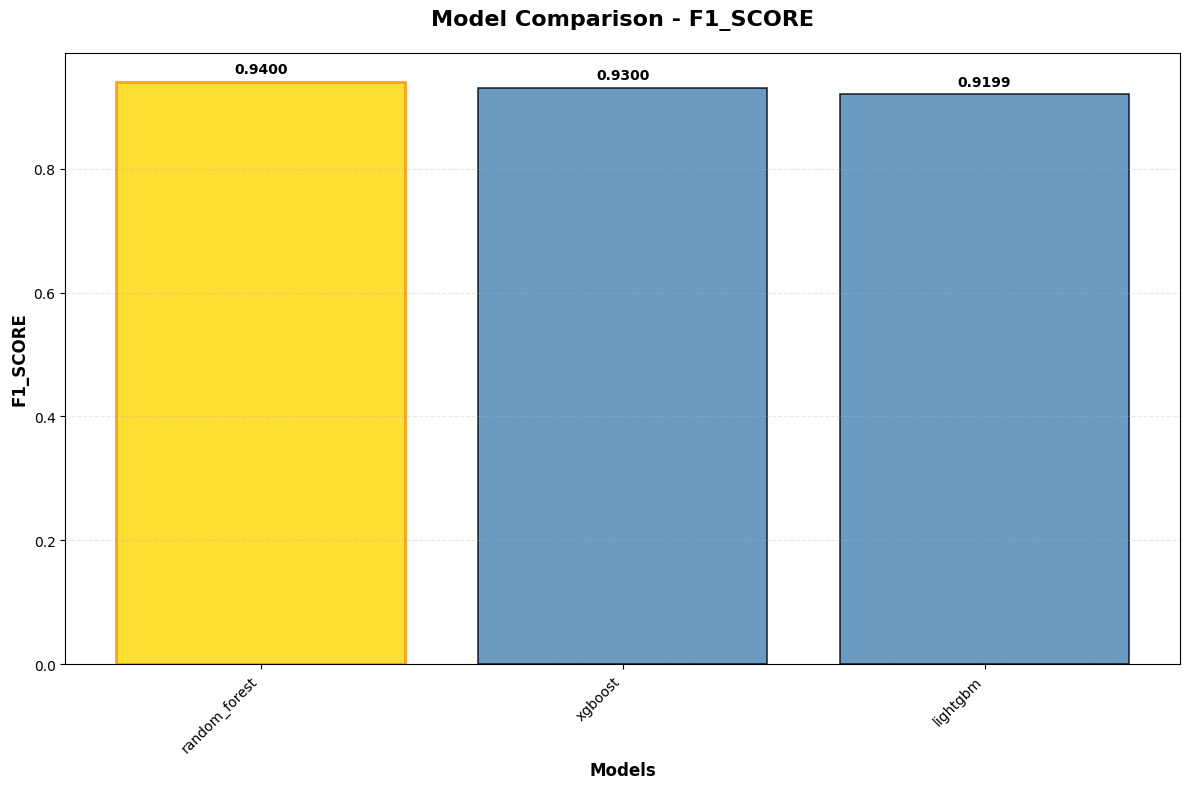

In [6]:
results = predictor.run_pipeline(
    df=df_class,
    target_column='churn',
    test_size=0.2,
    compare=True,  
    explain=True   #
)